In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cpp_wrappers

In [111]:

def gentrace(f, bintime, pulsetime):
    macrotime2bin = pulsetime / bintime
    NumRecords = cpp_wrappers.ptuHeader_wrap (f)
    eventN, tac, t, can = cpp_wrappers.ptu_wrap(f, NumRecords)
    nbins = np.ceil((max(t)-t[0]) * macrotime2bin).astype(np.int) # calculates total number of bins
    trace = np.zeros([nbins, 4])
    for i in range(NumRecords):
        #int cast rounds float down
        if t[i] != 0:
            trace[int((t[i] - t[0]) * macrotime2bin), can[i]] += 1
    return trace

def isptu(f):
    return f[-4:] == b'.ptu'

In [133]:
root = b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\'
dirs = [root + b'exc561_10pct\\',
       root + b'exc561_20pct\\',
       root + b'exc561_30pct\\',
       root + b'exc561_40pct\\',
       root + b'exc561_50pct\\',
       root + b'exc561_70pct\\',
       root + b'exc561_100pct\\']
integratedphotons = np.zeros([7, 10, 2])
for i, wdir in enumerate(dirs):
    files = os.listdir(wdir)
    files = [wdir + f for f in files]
    files = filter(isptu, files)


    bintime = 10 #bintime in ms
    pulsetime = 25e-6 # pulsetime in ms

    crosstalkGR = 0.54 
    for j, f in enumerate(files):
        print(f)
        trace = gentrace(f, bintime, pulsetime)
        trace = np.subtract(trace, np.mean(trace[:200, :], axis = 0))
        integratedphotons[i, j, 0] = sum(trace[:,0] + trace[:,2])
        integratedphotons[i, j, 1] = sum(trace[:,1] + trace[:,3]) \
            - crosstalkGR * integratedphotons[i, j, 0]

b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\LSM_21.ptu'
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\header\\LSM_21.txt'
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\LSM_22.ptu'
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\header\\LSM_22.txt'
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\LSM_23.ptu'
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\header\\LSM_23.txt'
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\LSM_24.ptu'
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\header\\LSM_24.txt'
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_traces\\exc561_10pct\\LSM_25.ptu'
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\09_STED_singlem_tr

IndexError: index 10 is out of bounds for axis 1 with size 10

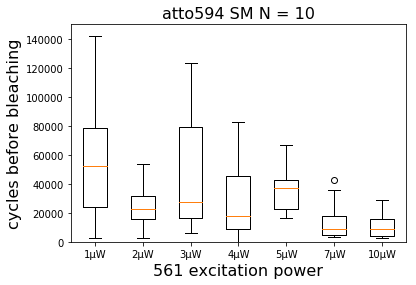

In [156]:
os.chdir(r'K:\vanderVoortN\FRC\analysisNotebooks')
labels = ('1µW', '2µW', '3µW', '4µW', '5µW', '7µW', '10µW')
plt.boxplot(np.transpose(integratedphotons[:,:,0]), labels = labels)
ax = plt.gca()
ax.set_ylim([0,150000])
plt.xlabel('561 excitation power', size = 16)
plt.ylabel('cycles before bleaching', size = 16)
plt.title('atto594 SM N = 10', size = 16)
plt.savefig('20191009_atto594_cycle_powerDependance.png', dpi = 300, bbox_inches = 'tight')
plt.show()

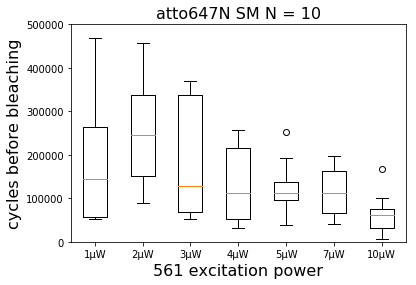

In [157]:
labels = ('1µW', '2µW', '3µW', '4µW', '5µW', '7µW', '10µW')
plt.boxplot(np.transpose(integratedphotons[:,:,1]), labels = labels)
ax = plt.gca()
ax.set_ylim([0,500000])
plt.xlabel('561 excitation power', size = 16)
plt.ylabel('cycles before bleaching', size = 16)
plt.title('atto647N SM N = 10', size = 16)
plt.savefig('20191009_atto647N_cycle_powerDependance.png', dpi = 300, bbox_inches = 'tight')
plt.show()